# Your name: Jose Dominguez Alonso

# Assignment Name: CA03-Decision Tree Algorithm

In [1]:
#Import needed packages/programs  
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
 
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#read data using URL
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [3]:
#check the data
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


# Data Quality Analysis

Do all of these inside your Notebook: 
• Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. 
• Display descriptive statistics of each column 
• Perform necessary data cleansing and transformation based on your 
observations from the data quality analysis

In [4]:
# Number of total rows and columns
data.shape

(48842, 11)

In [5]:
# Count of values per column
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [6]:
# Number of null values per column
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [9]:
# Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


# Exploratory Data Analysis



In [ ]:
# Age bin
# The first step to create the graph is to put the binned age column into 
#a crosstab. As it would make it easier to later create visualizations.
age_bin_graph = pd.crosstab(index = data.age_bin, columns = data.y, normalize = 'index')
age_bin_graph

y,0,1
age_bin,,
a. 0-25,0.982445,0.017555
b. 26-30 & 71-100,0.861388,0.138612
c. 31-35 & 61-70,0.757292,0.242708
d. 36-40 & 56-60,0.668982,0.331018
e. 40-55,0.618062,0.381938


<function matplotlib.pyplot.show>

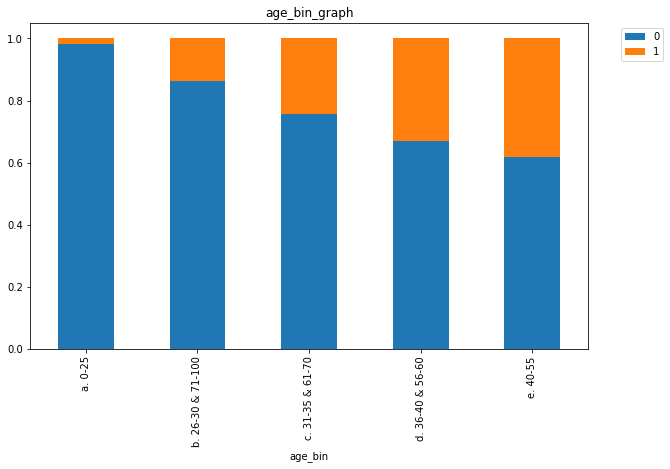

In [ ]:
# Here we create a stacked bar chart which represents the proportions 
#of the y column in relation to age_bin. The 0 meaning low income (<=50k)
#and the 1 meaning high income (>50k)
age_bin_graph.plot(kind = 'bar', stacked = True, figsize = (10,6), title = 'age_bin_graph')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
plt.show

In [ ]:
# Education bin
# Here we do the same steps as previously but this time we use the column
#calles education_bin to create the crosstab.
education_tab = pd.crosstab(index = data.education_bin, columns = data.y, normalize = 'index')
education_tab

y,0,1
education_bin,,
a. Low,0.942884,0.057116
b. Mid,0.818593,0.181407
c. Bachelors,0.587165,0.412835
d. Masters,0.450884,0.549116
e. High,0.266106,0.733894


<function matplotlib.pyplot.show>

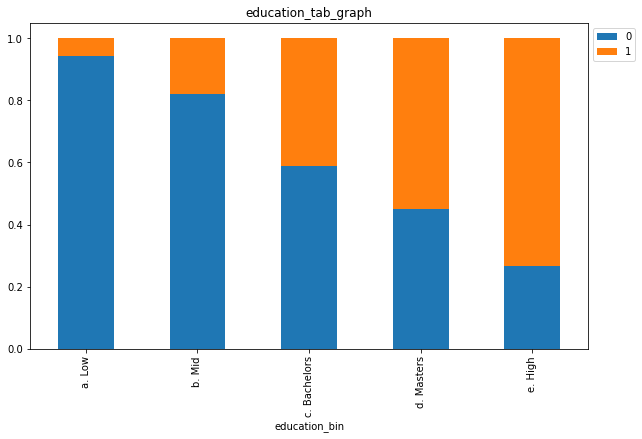

In [ ]:
#Again we use the information from the crosstab created to do a stacked bar chart.
#Here the 1's and 0's still represent high and low income.
education_tab.plot(kind = 'bar', stacked = True, figsize = (10,6),title = 'education_tab_graph')
plt.legend(bbox_to_anchor = (1.0,1.0), loc = 'upper left')
plt.show

In [ ]:
# Hours per week bin
#Let's do the same with column hours_tab.
hours_tab = pd.crosstab(index = data.hours_per_week_bin, columns = data.y, normalize = 'index')
hours_tab

y,0,1
hours_per_week_bin,,
a. 0-30,0.933002,0.066998
b. 31-40,0.796576,0.203424
c. 71-100,0.655039,0.344961
d. 41-50 & 61-70,0.607801,0.392199
e. 51-60,0.567970,0.432030


<function matplotlib.pyplot.show>

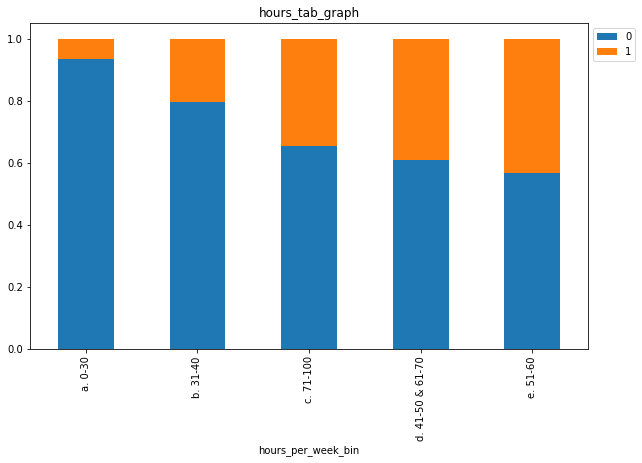

In [ ]:
#Let's visualize it the same way
hours_tab.plot(kind = 'bar', stacked = True, figsize = (10,6), title = 'hours_tab_graph')
plt.legend(bbox_to_anchor = (1.0,1.0), loc = 'upper left')
plt.show

In [ ]:
# msr_bin
#Let's crosstab marriage_tab and create the same visualization.
marriage_tab = pd.crosstab(index = data.msr_bin, columns = data.y, normalize = 'index')
marriage_tab

y,0,1
msr_bin,,
a. Low,0.983893,0.016107
b. Mid,0.900933,0.099067
c. High,0.549190,0.450810


<function matplotlib.pyplot.show>

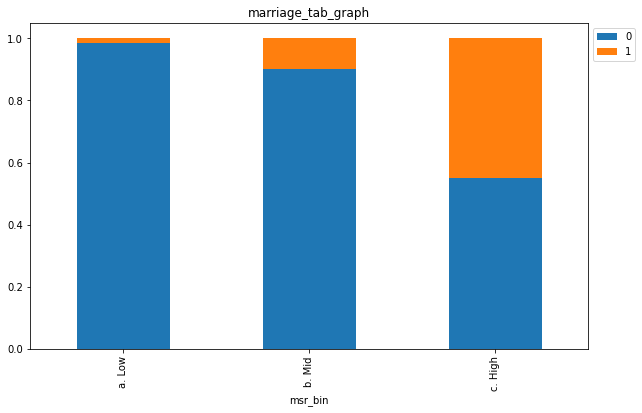

In [ ]:
marriage_tab.plot(kind = 'bar', stacked = True, figsize = (10,6), title ='marriage_tab_graph')
plt.legend(bbox_to_anchor = (1.0,1.0), loc = 'upper left')
plt.show

In [ ]:
# Occupation bin
#Let's look now at occupation_tab and see the results
occupation_tab = pd.crosstab(index = data.occupation_bin, columns = data.y, normalize = 'index')
occupation_tab

y,0,1
occupation_bin,,
a. Low,0.952328,0.047672
b. Mid - Low,0.877732,0.122268
c. Mid - Mid,0.761005,0.238995
d. Mid - High,0.700288,0.299712
e. High,0.535650,0.464350


<function matplotlib.pyplot.show>

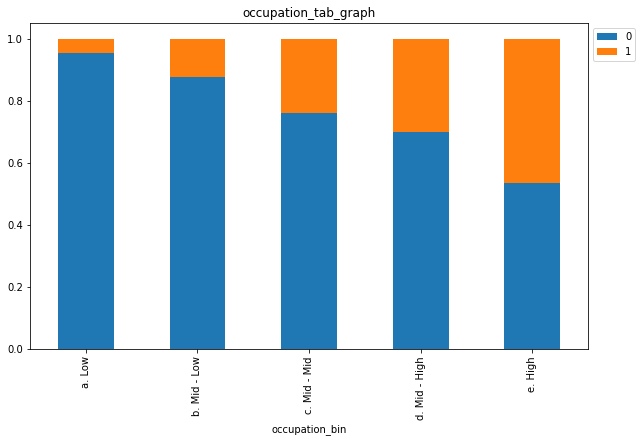

In [ ]:
#Let's create the same stacked bar char and compare to the rest.
occupation_tab.plot(kind = 'bar', stacked = True, figsize = (10,6), title = 'occupation_tab_graph')
plt.legend(bbox_to_anchor = (1.0,1.0), loc = 'upper left')
plt.show

In [ ]:
# Race sex bin
#Let's look at the last column race_sex_tab and visualize it
race_sex_tab = pd.crosstab(index = data.race_sex_bin, columns = data.y, normalize = 'index')
race_sex_tab

y,0,1
race_sex_bin,,
a. Low,0.940332,0.059668
b. Mid,0.870936,0.129064
c. High,0.683727,0.316273


<function matplotlib.pyplot.show>

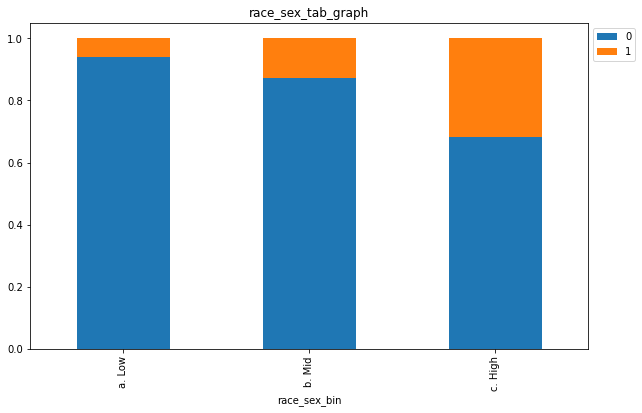

In [ ]:
race_sex_tab.plot(kind = 'bar', stacked = True, figsize = (10,6),title = 'race_sex_tab_graph')
plt.legend(bbox_to_anchor = (1.0,1.0), loc = 'upper left')
plt.show

# Build Decision Tree Classifier Models

In [10]:
# Import Package to build Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [42]:
# Split the data into train set and test set

data_train_set = data[data['flag'] == 'train']
data_test_set = data[data['flag'] == 'test']

In [46]:
#Let's select the independant and dependant variables that we are going to use from the dataset
X_train = pd.get_dummies(data_train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=data_train_set['y']
X_test=pd.get_dummies(data_test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=data_test_set['y']

In [47]:
# Let's use Ordinal Encoder to transform categorical variables to numerical variables.
# Let's name it encode to make it easier to know we are encoding now.

encode = preprocessing.OrdinalEncoder()

In [49]:
# Here let's encode the train data set

encode.fit(X_train)
X_train= encode.transform(X_train)
X_train= pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
# Here let's encode the test data set
encode.fit(X_test)
X_test= encode.transform(X_test)
X_test= pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Syntax to use the classifier: 
**random_state**: This is a number you choose arbitrarily. It’s also called “Random Seed”. If you use a number for this parameter (any number), it ensures that if you run the program multiple times, it will generate the same randomness. Hence, the solution becomes more “reproduceable”.

In [52]:
# Let's build a decision tree by using in the DecisionTreeClassifier and using the following example:
#from sklearn.tree import DecisionTreeClassifier
#dtree = DecisionTreeClassifier(max_depth=10, random_state=101, 
                               #max_features=None, min_samples_leaf=15)

dtree = DecisionTreeClassifier(max_depth=7, random_state=25, 
                               max_features=None, min_samples_leaf=10)
# Fit the data and predict
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

# Visualizing Decision Tree Using GraphViz

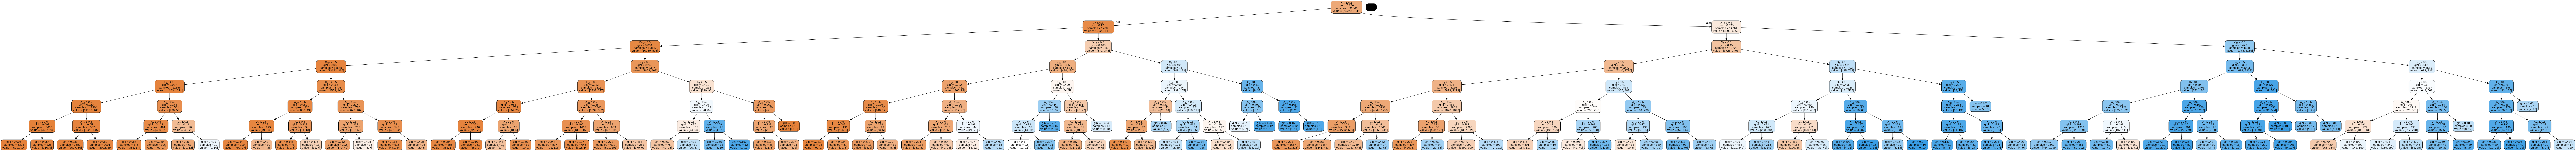

In [54]:
#import packages in order to create the visualization using GraphViz
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Evaluate Decision Tree

In [25]:
import sklearn.metrics as metrics 

In [55]:
# Let's create the confusion matrix
# This will show us the number of true positives, false positives, true negatives and false negatives in a matrix. 

data_confusion_matrix = confusion_matrix(y_test, y_pred)
print(data_confusion_matrix)

[[11505   930]
 [ 1737  2109]]


In [56]:
# Let's check the accuracy score of the model
print(accuracy_score(y_test, y_pred))

0.8361894232540998


In [57]:
# Let's analyze more deeply the model looking at
# the precision, recall, f1 scores & support.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.84      0.83     16281



In [58]:
# Let's calculate the AUC value (area under the curve)
print(roc_auc_score(y_test, y_pred))

0.7367865160927306


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


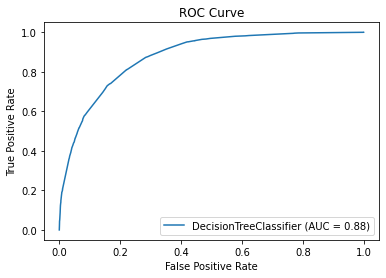

In [63]:
# Let's visualize the ROC Curve Graph
roc_plot = plot_roc_curve(dtree, X_test, y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Tuning Decision Tree Performance 

In [67]:
# Here we are reading the manual Tree Tuning Cases excel sheet, I created. 
# It shows decision tree hyperparameter variations and the tree performance
tree_tuning = pd.read_excel('/content/manual tuning.xlsx')
tree_tuning

,criteria,min_sample_split,min_sample_leaf,max_depth,accuracy,recall,precision,f1
0,entropy,3,8,7,NaN,NaN,NaN,NaN
1,entropy,4,3,5,NaN,NaN,NaN,NaN
2,entropy,5,6,15,NaN,NaN,NaN,NaN
3,entropy,15,7,20,NaN,NaN,NaN,NaN
4,gini,2,10,3,NaN,NaN,NaN,NaN
5,gini,7,5,9,NaN,NaN,NaN,NaN
6,gini,12,7,14,NaN,NaN,NaN,NaN
7,gini,9,10,11,NaN,NaN,NaN,NaN


In [68]:
# Here let's create a loop in order to iterate through values and have the results return 
# We trying to get the last part of the dataset completed automatically to see how the tree performance is changing the values on the model. 
for x in range(0,8):
    dtree_hyper = DecisionTreeClassifier(
        min_samples_split = tree_tuning.iloc[x,1],
        min_samples_leaf = tree_tuning.iloc[x,2],
        max_depth = tree_tuning.iloc[x,3],
        random_state = 25,
        max_features = None,
        criterion = tree_tuning.iloc[x,0])
    
    # Here we fitting the model and looking for predictions
    dtree_hyper.fit(X_train, y_train)
    y_pred=dtree_hyper.predict(X_test)
    
    accuracy_table=[]
    recall_table=[]
    precision_table=[]
    f1_table=[]
    
    accuracy_table.append(accuracy_score(y_test, y_pred))
    recall_table.append(recall_score(y_test, y_pred))
    precision_table.append(precision_score(y_test, y_pred))
    f1_table.append(f1_score(y_test, y_pred))
    
    tree_tuning.iloc[x,4]=accuracy_table[0]
    tree_tuning.iloc[x,5]=recall_table[0]
    tree_tuning.iloc[x,6]=precision_table[0]
    tree_tuning.iloc[x,7]=f1_table[0]


In [70]:
#Let's display the completed table 
tree_tuning

,criteria,min_sample_split,min_sample_leaf,max_depth,accuracy,recall,precision,f1
0,entropy,3,8,7,0.836865,0.554342,0.693559,0.616185
1,entropy,4,3,5,0.827836,0.480759,0.696422,0.568836
2,entropy,5,6,15,0.837971,0.555382,0.697128,0.618234
3,entropy,15,7,20,0.837971,0.562663,0.693590,0.621303
4,gini,2,10,3,0.825932,0.521061,0.668892,0.585794
5,gini,7,5,9,0.840059,0.563183,0.700971,0.624567
6,gini,12,7,14,0.838585,0.561362,0.696452,0.621653
7,gini,9,10,11,0.840366,0.558242,0.704628,0.622951


# Prediction Using Decision Tree Model

Now make prediction of a “new” individual’s Income Category ( <=50K, or >50K ) with the following information:

• Hours Worked per Week = 48

• Occupation Category = Mid - Low

• Marriage Status & Relationships = High

• Capital Gain = Yes

• Race-Sex Group = Mid

• Number of Years of Education = 12

• Education Category = High

• Work Class = Income

• Age = 58

In [71]:
#Let's make a new dataframe with the information given
individual_pred = pd.DataFrame({'age_bin_b. 26-30 & 71-100':0,'age_bin_c. 31-35 & 61-70':0,'age_bin_d. 36-40 & 56-60':1,'age_bin_e. 40-55':0,'capital_gl_bin_b. < 0':0,'capital_gl_bin_c. > 0':1,'education_bin_b. Mid':0,'education_bin_c. Bachelors':0,'education_bin_d. Masters':0,'education_bin_e. High':1,'hours_per_week_bin_b. 31-40':0,'hours_per_week_bin_c. 71-100':0,'hours_per_week_bin_d. 41-50 & 61-70':1,'hours_per_week_bin_e. 51-60':0,'msr_bin_b. Mid':0,'msr_bin_c. High':1,'occupation_bin_b. Mid - Low':1,'occupation_bin_c. Mid - Mid':0,'occupation_bin_d. Mid - High':0,'occupation_bin_e. High':0,'race_sex_bin_b. Mid':1,'race_sex_bin_c. High':0,'education_num_bin_b. 9-12':1,'education_num_bin_c. 13':0,'education_num_bin_d. 14':0,'education_num_bin_e. 15+':0,'workclass_bin_b. income':1},index=[0])
individual_pred

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,workclass_bin_b. income
0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1


In [80]:
# Using the best model let's get the prediction of the new individual
# Running the decision tree classifier and setting hyperparameters
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_split = 9, random_state = 25, 
                               max_features = None, min_samples_leaf = 10) 

# Fitting the model
dtree.fit(X_train, y_train)

# Getting the predictions and the prediction probabilities
pred = dtree.predict(individual_pred)
pred_prob = dtree.predict_proba(individual_pred)
print('Prediction:',pred)
print('Prediction Probabilites [0,1]:',pred_prob)

#Using if to state the income of individual
if pred == 0:
  print('Income is <=50k.')
elif pred == 1:
  print('Income is >50k.')

Prediction: [0]
Prediction Probabilites [0,1]: [[0.71428571 0.28571429]]
Income is <=50k.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
